# P3:

Error de reconstrucción (RMSE): 0.028209045720963104


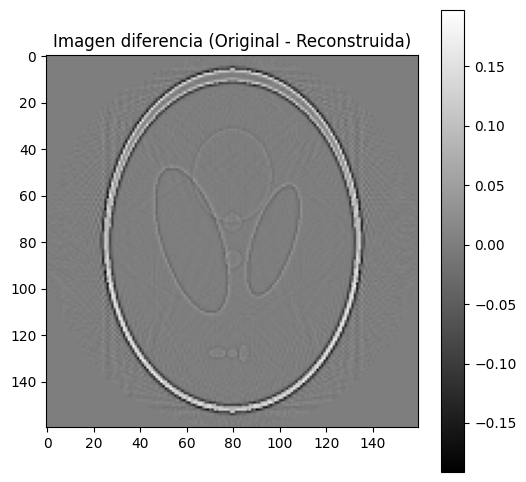

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale

# Cargar la imagen original
imagen = shepp_logan_phantom()
image = rescale(imagen, scale=0.4, mode='reflect', channel_axis=None)

# Parámetros
num_angles = 180
theta = np.linspace(0., 180., num_angles, endpoint=False)

# Generar sinograma
sinogram = radon(image, theta=theta, circle=True)

# Reconstrucción por retroproyección filtrada
reconstructed = iradon(sinogram, theta=theta, filter_name="ramp")

# Normalizar la imagen reconstruida a la media de la original
mean_original = np.mean(image)
mean_reconstructed = np.mean(reconstructed)
reconstructed_normalized = reconstructed * (mean_original / mean_reconstructed)

# Calcular la imagen diferencia
image_difference = image - reconstructed_normalized

# Calcular error RMSE
rmse = np.sqrt(np.mean(image_difference**2))
print(f"Error de reconstrucción (RMSE): {rmse}")

# Graficar imagen diferencia
plt.figure(figsize=(6, 6))
plt.imshow(image_difference, cmap='gray')
plt.colorbar()
plt.title("Imagen diferencia (Original - Reconstruida)")
plt.show()


In [15]:
print(image.shape)

(256, 256)


# P4:

## Este es el que calcula error segun nro detectores

C:\Users\Franco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skimage\transform\radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


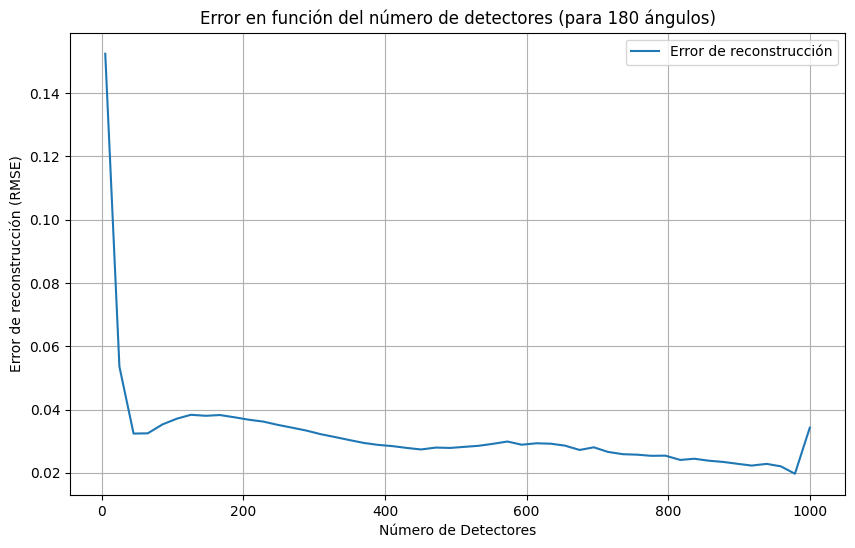

In [4]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen original
imagen = shepp_logan_phantom()


# Función para calcular RMSE
def calculate_rmse(reconstructed_image, original_image):
    mean_original = np.mean(original_image)
    mean_reconstructed = np.mean(reconstructed_image)
    image_reconstructed_normalized = reconstructed_image * (mean_original / mean_reconstructed)
    error = image_reconstructed_normalized - original_image
    rmse = np.sqrt(np.mean(error**2))
    return rmse

# Parámetros
num_angles = 180  # Número de ángulos fijo
detectors_range = np.linspace(5, 1000, 50, dtype=int)  # 50 puntos entre 1 y 600 para el número de detectores

# Almacenar resultados
detector_errors = []

# Realizar experimento variando número de detectores
for num_detectors in detectors_range:
    escala = num_detectors / 1000  # Escalar la imagen para que el número de detectores sea proporcional al tamaño de la imagen
    image = rescale(imagen, scale=escala, mode='reflect', channel_axis=None)
    # Realizamos la transformada de radon con el número adecuado de detectores
    theta = np.linspace(0., 180., num_angles, endpoint=False)
    
    # Usamos el número de detectores directamente sin redimensionar la imagen
    sinogram = radon(image, theta=theta, circle=True)
    
    # Reconstruir la imagen con retroproyección filtrada
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')  # Usar filtro "ramp" por defecto
    
    # Calcular el error de reconstrucción (RMSE)
    rmse = calculate_rmse(reconstruction_fbp, image)
    
    # Almacenar el resultado
    detector_errors.append(rmse)

# Graficar el error en función del número de detectores
plt.figure(figsize=(10, 6))
plt.plot(detectors_range, detector_errors, label='Error de reconstrucción')
plt.xlabel('Número de Detectores')
plt.ylabel('Error de reconstrucción (RMSE)')
plt.title(f'Error en función del número de detectores (para {num_angles} ángulos)')
plt.legend()
plt.grid(True)
plt.show()


## Ahora para el error vs nro de angulos

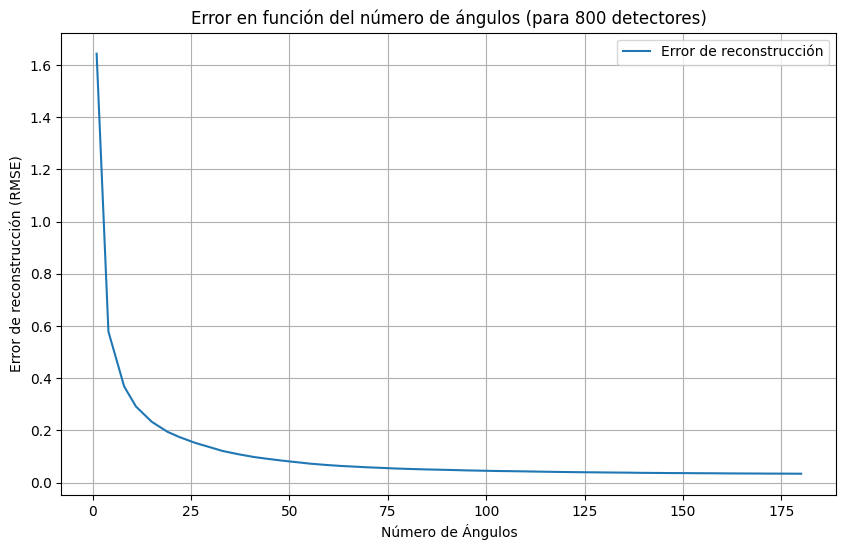

In [14]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen original
imagen = shepp_logan_phantom()

# Parámetros
num_detectors = 800  # Número de detectores fijo
angles_range = np.linspace(1, 180, 50, dtype=int)  # 50 puntos entre 1 y 180 para el número de ángulos

#Aca reescaleo la iamgen para tener efectivamente 800 detectores:
escala = num_detectors / 800  # Escalar la imagen para que el número de detectores sea proporcional al tamaño de la imagen
imagen = rescale(imagen, scale=escala, mode='reflect', channel_axis=None)



# Almacenar resultados
angle_errors = []   
#Ahora vamos a realizar el experimento variando el número de ángulos
for num_angles in angles_range:
    theta = np.linspace(0., 180., num_angles, endpoint=False)
    # Realizamos la transformada de radon con el número adecuado de ángulos
    sinogram = radon(imagen, theta=theta, circle=True)
    
    # Reconstruir la imagen con retroproyección filtrada
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')  # Usar filtro "ramp" por defecto
    
    # Calcular el error de reconstrucción (RMSE)
    rmse = calculate_rmse(reconstruction_fbp, imagen)
    
    # Almacenar el resultado
    angle_errors.append(rmse)
    
#Vamos a calcular el error en función del número de ángulos
plt.figure(figsize=(10, 6))
plt.plot(angles_range, angle_errors, label='Error de reconstrucción')
plt.xlabel('Número de Ángulos')
plt.ylabel('Error de reconstrucción (RMSE)')
plt.title(f'Error en función del número de ángulos (para {num_detectors} detectores)')
plt.legend()
plt.grid(True)
plt.show()


## Ahora para los distintos filtros

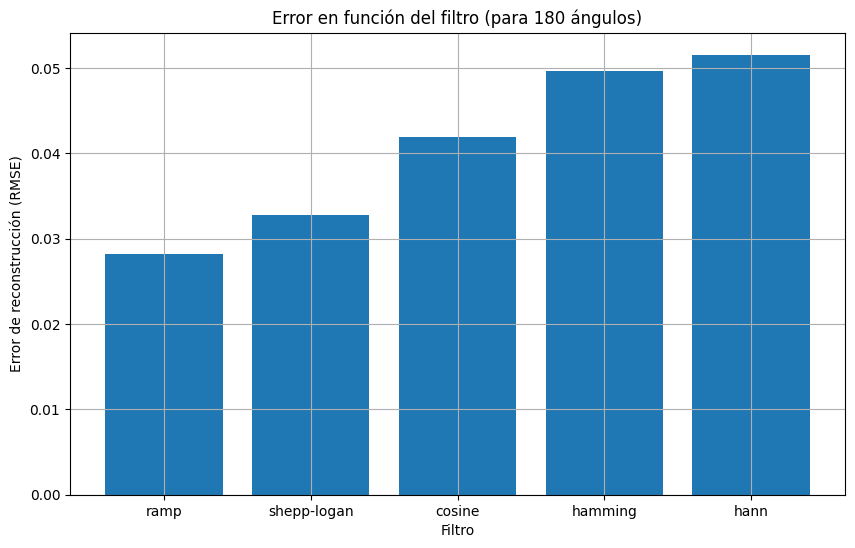

In [ ]:
# Aca voy a poner un numero de detectores fijo y un numero de angulos fijo (lo del numeor de detectores ya lo hice arriba) (scale = 0.4)
# Cargar imagen original
imagen = shepp_logan_phantom()
image = rescale(imagen, scale=0.4, mode='reflect', channel_axis=None)

# Parámetros

num_angles = 180  # Número de ángulos fijo
filter_names = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']  # Lista de nombres de filtros

# Almacenar resultados  
filter_errors = []

#loop para los filtros
for filter_name in filter_names:
    # Realizamos la transformada de radon con el número adecuado de ángulos
    theta = np.linspace(0., 180., num_angles, endpoint=False)
    sinogram = radon(image, theta=theta, circle=True)
    
    # Reconstruir la imagen con retroproyección filtrada
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name=filter_name)
    
    # Calcular el error de reconstrucción (RMSE)
    rmse = calculate_rmse(reconstruction_fbp, image)
    
    # Almacenar el resultado
    filter_errors.append(rmse)
    
# Graficar el error en función del filtro


plt.figure(figsize=(10, 6))
plt.bar(filter_names, filter_errors)
plt.xlabel('Filtro')
plt.ylabel('Error de reconstrucción (RMSE)')
plt.title(f'Error en función del filtro (para {num_angles} ángulos)')
plt.grid(True)
plt.show()

# P5:
Ahora es lo mismo que la ventana de arriba pero antes de hacer algo vamos a agregarle ruido a la imagen

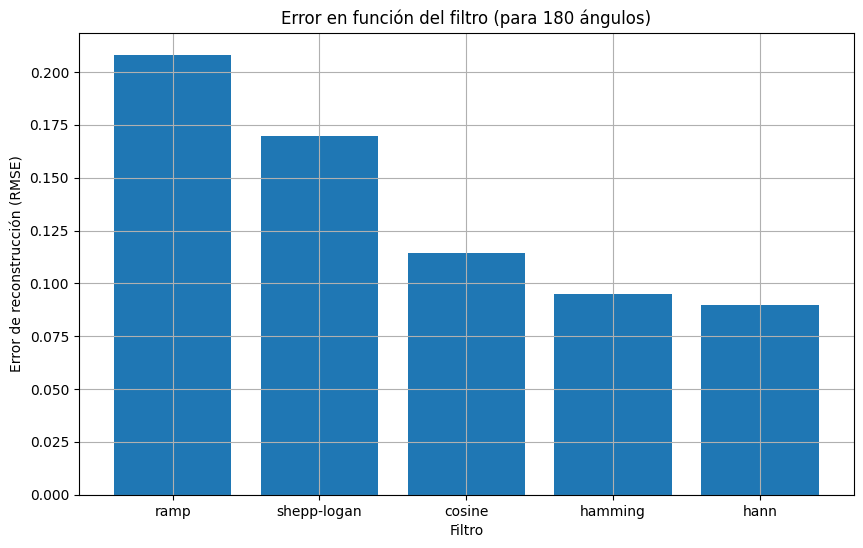

In [7]:
import numpy as np
import cv2
import os  # Para crear la carpeta si no existe
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import matplotlib.pyplot as plt


def calculate_rmse(reconstructed_image, original_image):
    mean_original = np.mean(original_image)
    mean_reconstructed = np.mean(reconstructed_image)
    image_reconstructed_normalized = reconstructed_image * (mean_original / mean_reconstructed)
    error = image_reconstructed_normalized - original_image
    rmse = np.sqrt(np.mean(error**2))
    return rmse

# Crear carpeta si no existe
output_folder = "p5"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Cargar imagen original
imagen = shepp_logan_phantom()
cv2.imshow('Imagen Original', imagen)
cv2.waitKey(0)
image = rescale(imagen, scale=1, mode='reflect', channel_axis=None)

# Parámetros
num_angles = 180  # Número de ángulos fijo
filter_names = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']  # Lista de nombres de filtros

# Almacenar resultados  
filter_errors = []

# Realizamos la transformada de Radon con el número adecuado de ángulos
theta = np.linspace(0., 180., num_angles, endpoint=False)
sinogram = radon(image, theta=theta, circle=True)

# Añadir ruido al sinograma
ruido = np.random.normal(0, 5, sinogram.shape)
sinogram_noisy = sinogram + ruido


# Loop para los filtros
for filter_name in filter_names:


    # Reconstruir la imagen con retroproyección filtrada
    reconstruction_fbp = iradon(sinogram_noisy, theta=theta, filter_name=filter_name)
    reconstruction_fbp_normalized = cv2.normalize(reconstruction_fbp, None, 0, 255, cv2.NORM_MINMAX)
    reconstruction_fbp_normalized = np.uint8(reconstruction_fbp_normalized)
    # Mostrar y guardar imágenes

        
    # Guardar las imágenes en la carpeta p5
    reconstruction_filename = f"{output_folder}/reconstruction_{filter_name}.png"

    #cv2.imwrite(sinogram_filename, sinogram)
    #cv2.imwrite(sinogram_noisy_filename, sinogram_noisy)
    cv2.imwrite(reconstruction_filename, reconstruction_fbp_normalized,[cv2.IMWRITE_PXM_BINARY,0])

    # Calcular el error de reconstrucción (RMSE)
    rmse = calculate_rmse(reconstruction_fbp, image)
    
    # Almacenar el resultado
    filter_errors.append(rmse)

# Graficar el error en función del filtro
plt.figure(figsize=(10, 6))
plt.bar(filter_names, filter_errors)
plt.xlabel('Filtro')
plt.ylabel('Error de reconstrucción (RMSE)')
plt.title(f'Error en función del filtro (para {num_angles} ángulos)')
plt.grid(True)
plt.show()


# P6:
Crear una imagen cuyo ´unico objeto sea un peque˜no c´ırculo (D = 5 pixels) centrado en el origen. Crear proyecciones paralelas (con 100 detectores cada una) y luego generar una imagen mediante retroproyecci´on.
Probar con 8, 16, 32 y 64 proyecciones. Repetir el proceso aplicando
un filtro rampa a las proyecciones.

In [9]:
#Vamos primero a crear el array con el ciruclo (vamos a hacer algo de 20x20 con un radio de 5 el circulo)
import numpy as np
import cv2

image = np.zeros((100,100))
cv2.circle(image, (50,50), 5, 1, -1)

cv2.imshow('imagen original',image)
cv2.waitKey(0)
cv2.imwrite('imagen_original.png',image*255)


True

## Recontrucción sin filtro

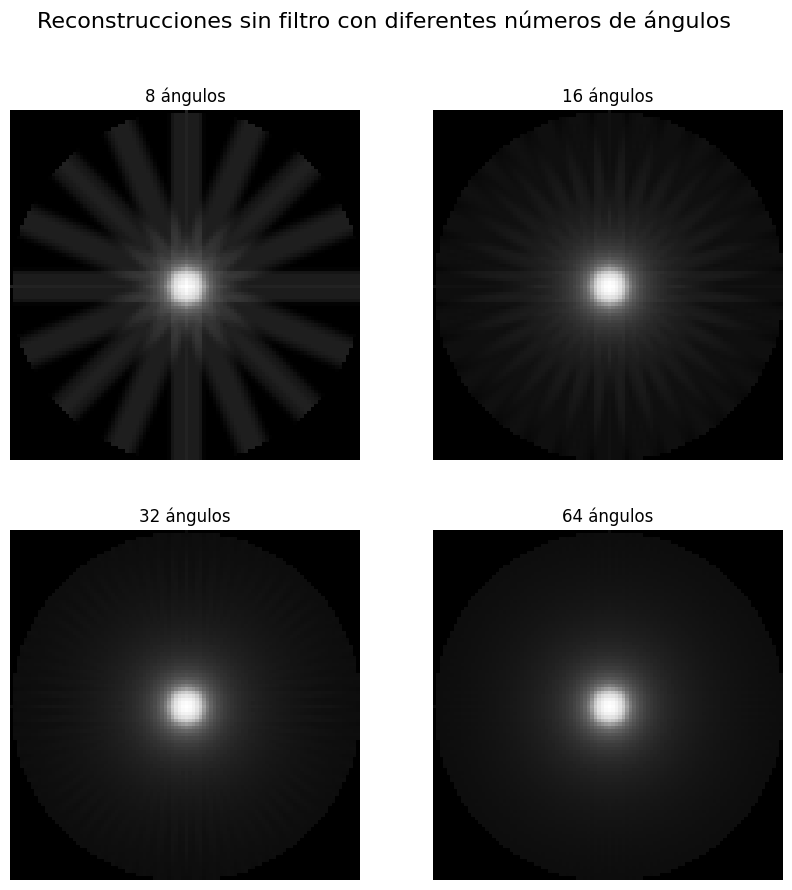

In [17]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt
import cv2


#vamos a crear ahora las proyecciones del circulo (8, 16, 32 y 64 angulos)
theta8 = np.linspace(0., 180., 8, endpoint=False)
sinogram_8 = radon(image, theta=theta8, circle=True)
theta16 = np.linspace(0., 180., 16, endpoint=False)
sinogram_16 = radon(image, theta=theta16, circle=True)
theta32 = np.linspace(0., 180., 32, endpoint=False)
sinogram_32 = radon(image, theta=theta32, circle=True)
theta64 = np.linspace(0., 180., 64, endpoint=False)   
sinogram_64 = radon(image, theta=theta64, circle=True)

#Ahora genero para cada uno de los sinogramas, una imagen usando retroporyección filtrada:
reconstruction_fbp_8 = iradon(sinogram_8, theta=theta8, filter_name=None)
reconstruction_fbp_16 = iradon(sinogram_16, theta=theta16, filter_name=None)
reconstruction_fbp_32 = iradon(sinogram_32, theta=theta32, filter_name=None)
reconstruction_fbp_64 = iradon(sinogram_64, theta=theta64, filter_name=None)

#Ya que estamos la guardamos en la catpera p6 (el reescaleo es para que quede mejor en el informe)
for i, reconstruction_fbp in enumerate([reconstruction_fbp_8, reconstruction_fbp_16, reconstruction_fbp_32, reconstruction_fbp_64]):
    #aca reescaleo la imagen para que quede mejor en el informe
    reconstruction_fbp = rescale(reconstruction_fbp, scale=4, mode='reflect', channel_axis=None)
    reconstruction_fbp_normalized = cv2.normalize(reconstruction_fbp, None, 0, 255, cv2.NORM_MINMAX)
    reconstruction_fbp_normalized = np.uint8(reconstruction_fbp_normalized)
    cv2.imwrite(f'p6/reconstruction_{(2**i)*8}.png', reconstruction_fbp_normalized)

#vamos a mostrar las 4 imagenes de salida en un solo grafico:
plt.figure(figsize=(10, 10))
#
# plt.title('Reconstrucciones con diferente número de ángulos sin filtro.')

plt.subplot(2, 2, 1)
plt.imshow(reconstruction_fbp_8, cmap='gray')
plt.title('8 ángulos')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(reconstruction_fbp_16, cmap='gray')
plt.title('16 ángulos')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(reconstruction_fbp_32, cmap='gray')
plt.title('32 ángulos')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(reconstruction_fbp_64, cmap='gray')
plt.title('64 ángulos')
plt.axis('off')

plt.suptitle('Reconstrucciones sin filtro con diferentes números de ángulos', fontsize=16)
plt.show()


## Recontrucción con filtro:

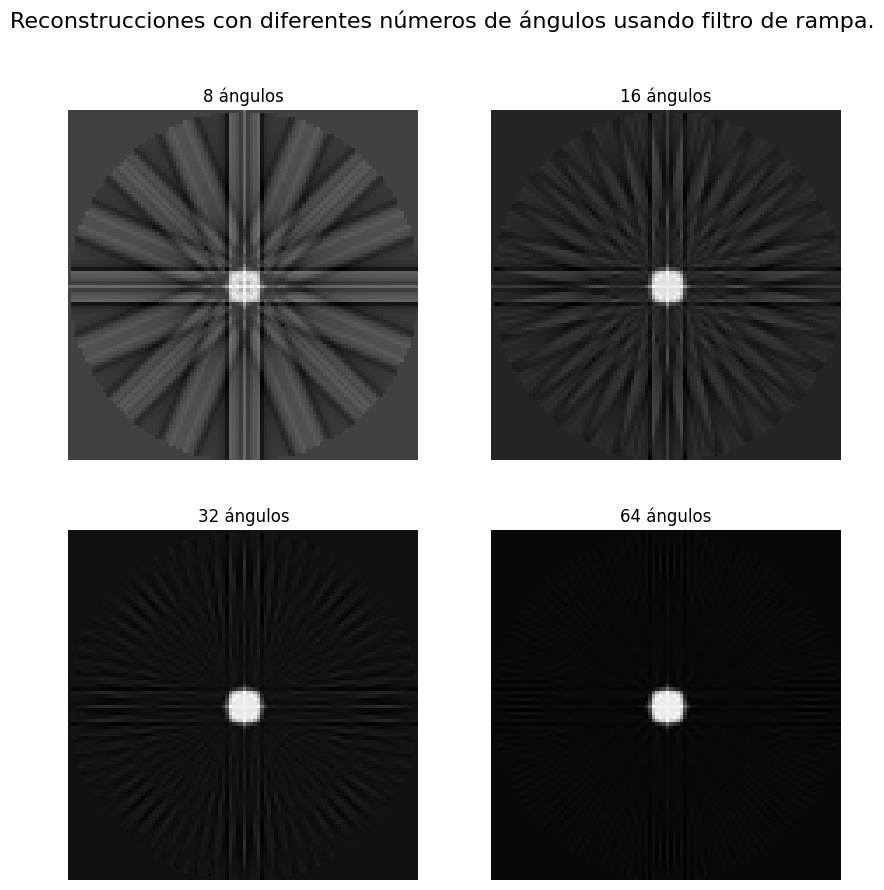

In [16]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt


#vamos a crear ahora las proyecciones del circulo (8, 16, 32 y 64 angulos)
theta8 = np.linspace(0., 180., 8, endpoint=False)
sinogram_8 = radon(image, theta=theta8, circle=True)
theta16 = np.linspace(0., 180., 16, endpoint=False)
sinogram_16 = radon(image, theta=theta16, circle=True)
theta32 = np.linspace(0., 180., 32, endpoint=False)
sinogram_32 = radon(image, theta=theta32, circle=True)
theta64 = np.linspace(0., 180., 64, endpoint=False)   
sinogram_64 = radon(image, theta=theta64, circle=True)

#Ahora genero para cada uno de los sinogramas, una imagen usando retroporyección filtrada:
reconstruction_fbp_8 = iradon(sinogram_8, theta=theta8, filter_name='ramp')
reconstruction_fbp_16 = iradon(sinogram_16, theta=theta16, filter_name='ramp')
reconstruction_fbp_32 = iradon(sinogram_32, theta=theta32, filter_name='ramp')
reconstruction_fbp_64 = iradon(sinogram_64, theta=theta64, filter_name='ramp')

#Tambien las voy a guardar en p6
for i, reconstruction_fbp in enumerate([reconstruction_fbp_8, reconstruction_fbp_16, reconstruction_fbp_32, reconstruction_fbp_64]):
        #aca reescaleo la imagen para que quede mejor en el informe
    reconstruction_fbp = rescale(reconstruction_fbp, scale=4, mode='reflect', channel_axis=None)
    reconstruction_fbp_normalized = cv2.normalize(reconstruction_fbp, None, 0, 255, cv2.NORM_MINMAX)
    reconstruction_fbp_normalized = np.uint8(reconstruction_fbp_normalized)
    cv2.imwrite(f'p6/reconstruction_{(2**i)*8}_ramp.png', reconstruction_fbp_normalized)


#vamos a mostrar las 4 imagenes de salida en un solo grafico:
plt.figure(figsize=(10, 10))
#
# plt.title('Reconstrucciones con diferente número de ángulos sin filtro.')

plt.subplot(2, 2, 1)
plt.imshow(reconstruction_fbp_8, cmap='gray')
plt.title('8 ángulos')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(reconstruction_fbp_16, cmap='gray')
plt.title('16 ángulos')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(reconstruction_fbp_32, cmap='gray')
plt.title('32 ángulos')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(reconstruction_fbp_64, cmap='gray')
plt.title('64 ángulos')
plt.axis('off')

plt.suptitle('Reconstrucciones con diferentes números de ángulos usando filtro de rampa.', fontsize=16)
plt.show()


# P7

Acá voy a hacer un fantoma de los que veniamos usando y al sinograma de eso, le voy a cambiar toda una linea de pixeles a 0

## Linea en 200 y 300 con 180 angulos

(400, 180)


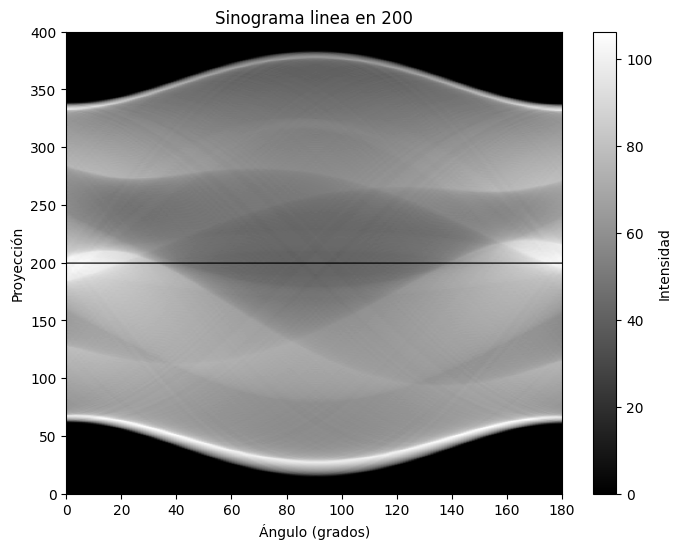

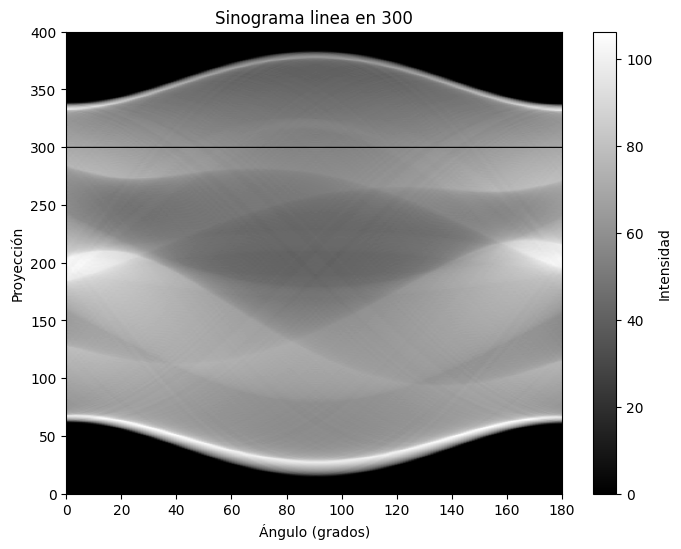

-1

In [27]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Cargar imagen original
imagen = shepp_logan_phantom()

#Calcular la transformada de radon de la imagen original
theta = np.linspace(0., 180., 180, endpoint=False)
sinogram = radon(imagen, theta=theta, circle=True)


print(sinogram.shape)

#yo lo que voy a hacer es cambiar a cero el valor de la columna 100
sinogram_200 = sinogram.copy()
sinogram_200[200,:] = 0
plt.figure(figsize=(8, 6))
plt.imshow(sinogram_200, cmap="gray", aspect="auto", extent=[0, 180, 0, sinogram.shape[0]])
plt.colorbar(label="Intensidad")
plt.xlabel("Ángulo (grados)")
plt.ylabel("Proyección")
plt.title("Sinograma linea en 200")
plt.show()


sinogram_100 = sinogram.copy()
sinogram_100[100,:] = 0
plt.figure(figsize=(8, 6))
plt.imshow(sinogram_100, cmap="gray", aspect="auto", extent=[0, 180, 0, sinogram.shape[0]])
plt.colorbar(label="Intensidad")
plt.xlabel("Ángulo (grados)")
plt.ylabel("Proyección")
plt.title("Sinograma linea en 300")
plt.show()

#Ahora reconstruyo la imagen
reconstruction_fbp = iradon(sinogram_100, theta=theta, filter_name='ramp')
cv2.imshow('reconstruccion linea 300',reconstruction_fbp)
cv2.waitKey(0)

#Ahora reconstruyo la imagen
reconstruction_fbp = iradon(sinogram_200, theta=theta, filter_name='ramp')
cv2.imshow('reconstruccion linea 200',reconstruction_fbp)
cv2.waitKey(0)

## Linea 200 y 300 con 360 grados

## 

(400, 180)


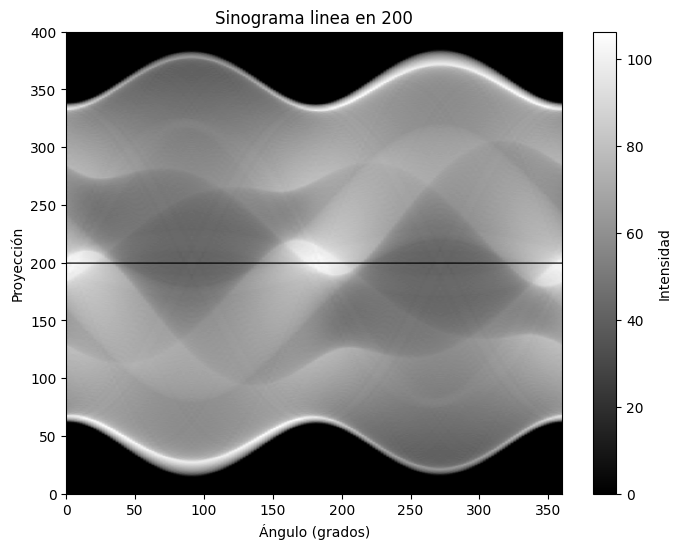

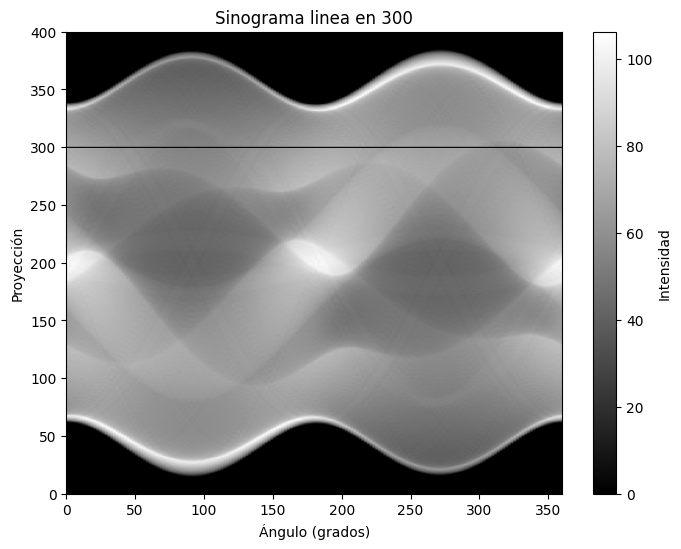

-1

In [28]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Cargar imagen original
imagen = shepp_logan_phantom()

#Calcular la transformada de radon de la imagen original
theta = np.linspace(0., 360., 180, endpoint=False)
sinogram = radon(imagen, theta=theta, circle=True)


print(sinogram.shape)

#yo lo que voy a hacer es cambiar a cero el valor de la columna 100
sinogram_200 = sinogram.copy()
sinogram_200[200,:] = 0
plt.figure(figsize=(8, 6))
plt.imshow(sinogram_200, cmap="gray", aspect="auto", extent=[0, 360, 0, sinogram.shape[0]])
plt.colorbar(label="Intensidad")
plt.xlabel("Ángulo (grados)")
plt.ylabel("Proyección")
plt.title("Sinograma linea en 200")
plt.show()


sinogram_100 = sinogram.copy()
sinogram_100[100,:] = 0
plt.figure(figsize=(8, 6))
plt.imshow(sinogram_100, cmap="gray", aspect="auto", extent=[0, 360, 0, sinogram.shape[0]])
plt.colorbar(label="Intensidad")
plt.xlabel("Ángulo (grados)")
plt.ylabel("Proyección")
plt.title("Sinograma linea en 300")
plt.show()

#Ahora reconstruyo la imagen
reconstruction_fbp = iradon(sinogram_100, theta=theta, filter_name='ramp')
cv2.imshow('reconstruccion linea 300',reconstruction_fbp)
cv2.waitKey(0)

#Ahora reconstruyo la imagen
reconstruction_fbp = iradon(sinogram_200, theta=theta, filter_name='ramp')
cv2.imshow('reconstruccion linea 200',reconstruction_fbp)
cv2.waitKey(0)

### Ahora voy a unir los dos anteriores, nomas para tener el grafico para el informe
La idea es hacer 2 plots. El primero con los 4 sinogramas modificados, 2 de 180 y 2 de 360 y las lineas en 300 y 200.
El otro plot van a ser las 4 reconstrucciones de los sinogramas anteriores.

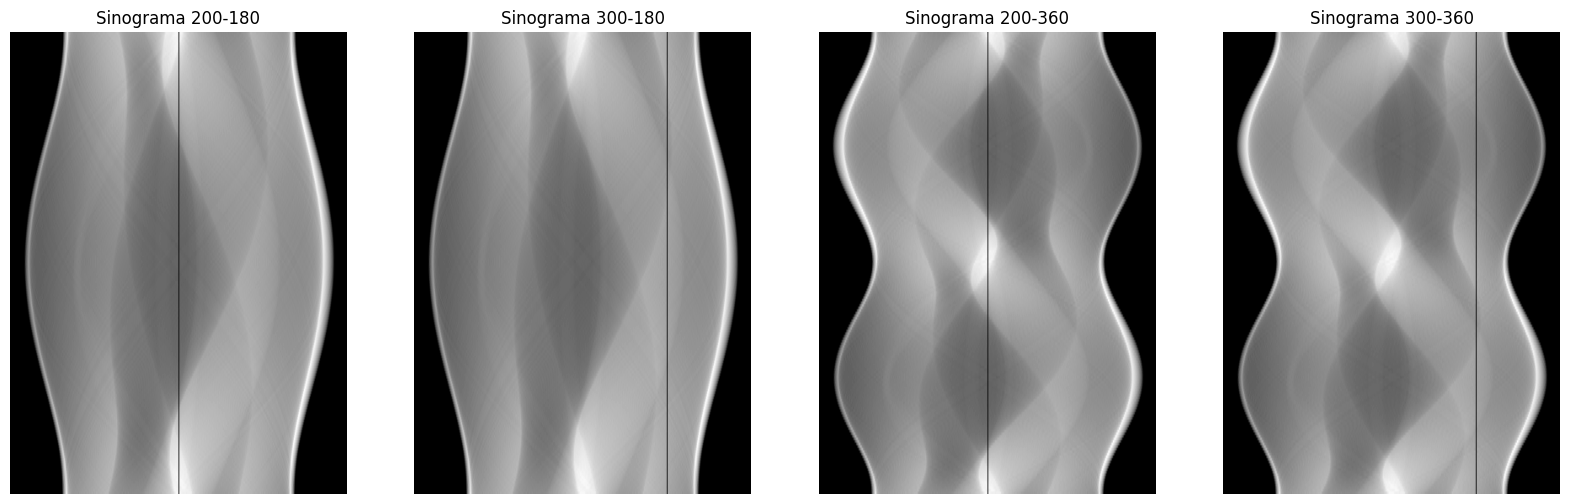

ValueError: The given ``theta`` does not match the number of projections in ``radon_image``.

In [ ]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Crear imagen fantoma
imagen = shepp_logan_phantom()

#Calcular la transformada de radon de la imagen original para 180 y 360
theta180 = np.linspace(0., 180., 180, endpoint=False)
sinogram180 = radon(imagen, theta=theta180, circle=True)
theta360 = np.linspace(0., 360., 180, endpoint=False)
sinogram360 = radon(imagen, theta=theta360, circle=True)

#Ahora creo los midifcados en 200 y en 300
sinogram_200_1 = sinogram180.copy()
sinogram_200_1[200,:] = 0
sinogram_300_1 = sinogram180.copy()
sinogram_300_1[300,:] = 0

sinogram_200_2 = sinogram360.copy()
sinogram_200_2[200,:] = 0  
sinogram_300_2 = sinogram360.copy()
sinogram_300_2[300,:] = 0

# #si los roto 90 grados
# sinogram_200_1 = np.rot90(sinogram_200_1, k=1)
# sinogram_300_1 = np.rot90(sinogram_300_1, k=1)
# sinogram_200_2 = np.rot90(sinogram_200_2, k=1)
# sinogram_300_2 = np.rot90(sinogram_300_2, k=1)

# #SOLO

#Ploteo los 4 sinogramas en un solo grafico (1 sola fila y sin colorbar or something related)
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.imshow(sinogram_200_1, cmap="gray", aspect="auto", extent=[0, 180, 0, sinogram180.shape[0]])
plt.title("Sinograma 200-180")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(sinogram_300_1, cmap="gray", aspect="auto", extent=[0, 180, 0, sinogram180.shape[0]])
plt.title("Sinograma 300-180")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(sinogram_200_2, cmap="gray", aspect="auto", extent=[0, 360, 0, sinogram360.shape[0]])
plt.title("Sinograma 200-360")
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(sinogram_300_2, cmap="gray", aspect="auto", extent=[0, 360, 0, sinogram360.shape[0]])
plt.title("Sinograma 300-360")
plt.axis('off')
plt.show()

#Ahora reconstruyo las 4 imagenes y hago el mismo plot de arriba
reconstruction_fbp_200_1 = iradon(sinogram_200_1, theta=theta180, filter_name='ramp')
reconstruction_fbp_300_1 = iradon(sinogram_300_1, theta=theta180, filter_name='ramp')   
reconstruction_fbp_200_2 = iradon(sinogram_200_2, theta=theta360, filter_name='ramp')
reconstruction_fbp_300_2 = iradon(sinogram_300_2, theta=theta360, filter_name='ramp')

#las voy a reescalear un poco igual
# reconstruction_fbp_200_1 = rescale(reconstruction_fbp_200_1, scale=4, mode='reflect', channel_axis=None)
# reconstruction_fbp_300_1 = rescale(reconstruction_fbp_300_1, scale=4, mode='reflect', channel_axis=None)
# reconstruction_fbp_200_2 = rescale(reconstruction_fbp_200_2, scale=4, mode='reflect', channel_axis=None)
# reconstruction_fbp_300_2 = rescale(reconstruction_fbp_300_2, scale=4, mode='reflect', channel_axis=None)


plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.imshow(reconstruction_fbp_200_1, cmap='gray',vmin=0,vmax=1)
plt.title('Reconstrucción 200-180')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(reconstruction_fbp_300_1, cmap='gray',vmin=0,vmax=1)
plt.title('Reconstrucción 300-180')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(reconstruction_fbp_200_2, cmap='gray',vmin=0,vmax=1)
plt.title('Reconstrucción 200-360')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(reconstruction_fbp_300_2, cmap='gray',vmin=0,vmax=1)
plt.title('Reconstrucción 300-360')
plt.axis('off')
plt.show()




